In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:


def dzdt(z, t, kb2, m1, m2):

    z1, z2, z3, z4, z5, z6, z7, z8 = z
# a special care should be taken here to avoid
# a situation of close encounter, when r21=0
# in the denominator
    r21 = np.sqrt((z5-z1)**2+(z7-z3)**2)
    eps = 1e-6
    if r21 < eps:
        r21 = eps
    fac = -kb2/r21**2
    dz = [z2, fac*(z5-z1)/m1, z4, fac*(z7-z3)/m1,z6, -fac*(z5-z1)/m2, z8, -fac*(z7-z3)/m2]
    return dz

In [3]:
m1 = 1
m2 = 1
kb = 1

vx1 = 10
z0 = [-10,10,0.5,0,0,0,-0.5,0] #x1,vx1,y1,vy1,x2,vx2,y2,vy2

n = 100
ti = 0
tf = 4
t = np.linspace(ti,tf,n)


In [4]:
solution1 = odeint(dzdt, z0, t, args=(kb,m1,m2))

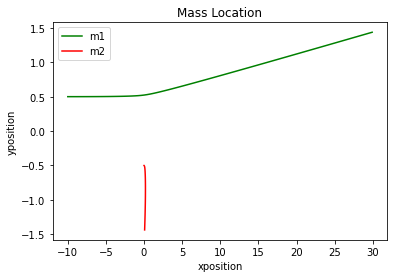

In [5]:


plt.plot(solution1[:,0], solution1[:,2], 'g', label = 'm1')
plt.plot(solution1[:,4], solution1[:,6], 'r', label = 'm2')
plt.xlabel('xposition')
plt.ylabel('yposition')
plt.title('Mass Location')
plt.legend()
plt.show()

In [6]:
index = np.where(solution1[:,0]**2 + solution1[:,2]**2 - solution1[:,4]**2 - solution1[:,6]**2 > 10)

In [7]:
print (index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
       83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)


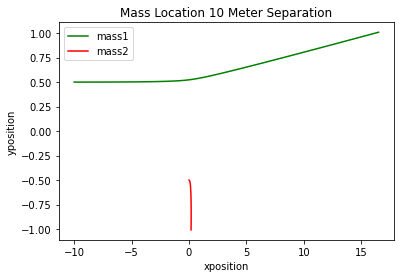

In [8]:
plt.plot(solution1[:,0][:67], solution1[:,2][:67], 'g', label = 'mass1')
plt.plot(solution1[:,4][:67], solution1[:,6][:67], 'r', label = 'mass2')
plt.xlabel('xposition')
plt.ylabel('yposition')
plt.title('Mass Location 10 Meter Separation')
plt.legend()
plt.show()

In [9]:
m = 100
tanAngle = ((solution1[-m,2]-solution1[-1,2])/(solution1[-m,0]-solution1[-1,0]))
angle = (np.arctan(tanAngle)/np.pi)*180
print('the scattering angle of the incident mass is',(angle),'degrees')

the scattering angle of the incident mass is 1.342956039192876 degrees


In [10]:
m = 100
tanAngle2 = ((solution1[-m,6]-solution1[-1,6])/(solution1[-m,4]-solution1[-1,4]))
angle2 = (np.arctan(tanAngle2)/np.pi)*180
print('the scattering angle of the incident mass is',(angle2),'degrees')

the scattering angle of the incident mass is -85.22437974033879 degrees


In [11]:
AngleSum = np.abs(angle)+np.abs(angle2)
print('the sum of the angles is',AngleSum,'degrees, which is very close to 90 degrees')

the sum of the angles is 86.56733577953166 degrees, which is very close to 90 degrees


In [12]:
momentum1 = m1*solution1[:,1][-1]
momentum2 = m2*solution1[:,5][-1]

Xmomentum = momentum1*np.cos(angle/180) + momentum2*np.cos(angle2/180)
Ymomentum = momentum1*np.sin(angle/180) + momentum2*np.sin(angle2/180)

print('the x-momentum is',Xmomentum)
print('the y-momentum is',Ymomentum)

the x-momentum is 10.010489731758469
the y-momentum is 0.1199826368818522


In [13]:
psum = np.sqrt((Xmomentum)**2+(Ymomentum)**2)
print('the sum of the momentum is',psum)

print('therefore the sum of the final momentum is equivalent to the intial momentum')

the sum of the momentum is 10.011208743343376
therefore the sum of the final momentum is equivalent to the intial momentum
